In [5]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
mobile_data = pd.read_csv("test.csv")

In [4]:
# Observe the first columns
print(mobile_data.head())

   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1 

In [6]:
# Summary statistics
print(mobile_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [8]:
# Further summary statistics
print(mobile_data.describe(include="all"))

                id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min

516 devices have bluetooth.
484 devices do not have bluetooth.


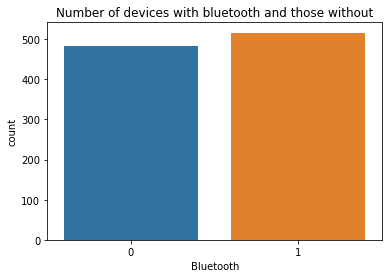

<Figure size 432x288 with 0 Axes>

In [19]:
# Devices with bt
bt_devices = len(mobile_data[mobile_data["blue"] == 1])
print(bt_devices, "devices have bluetooth.")

no_bt_devices = len(mobile_data[mobile_data["blue"] == 0])
print(no_bt_devices, "devices do not have bluetooth.")

# Visualization of devices with bluetooth and those without
sns.countplot(x="blue", data=mobile_data)
plt.xlabel("Bluetooth")
plt.title("Number of devices with bluetooth and those without")
plt.show()
plt.clf()

487 devices have 4G.
513 devices do not have 4G.


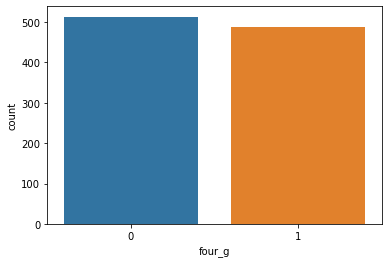

<Figure size 432x288 with 0 Axes>

In [23]:
# Devices with 4G
devices_4g = len(mobile_data[mobile_data["four_g"] == 1])
print(devices_4g, "devices have 4G.")

devices_4g_no = len(mobile_data[mobile_data["four_g"] == 0])
print(devices_4g_no, "devices do not have 4G.")

# Visualize this
sns.countplot(x="four_g", data=mobile_data)
plt.show()
plt.clf()

517 devices are dual sim.
483 devices are not dual sim.


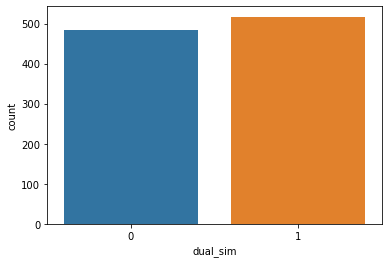

<Figure size 432x288 with 0 Axes>

In [29]:
# Devices with dual sim
dual_sim = len(mobile_data[mobile_data["dual_sim"] == 1])
print(dual_sim, "devices are dual sim.")

no_dual_sim = len(mobile_data[mobile_data["dual_sim"] == 0])
print(no_dual_sim, "devices are not dual sim.")

# Visualizing this
sns.countplot(x="dual_sim", data=mobile_data)
plt.show()
plt.clf()

258 devices have 4G and are dual sim.
742 devices do not have both 4G and dual sim.


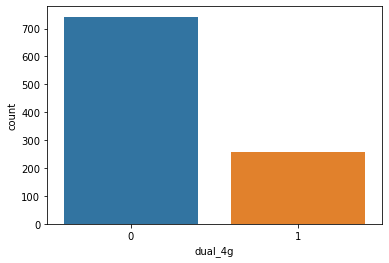

<Figure size 432x288 with 0 Axes>

In [44]:
# Number of mobile devices with 4g and dual sim
mobile_data["dual_4g"] = mobile_data.apply(lambda row: 1 if (row["four_g"] == 1) and (row["dual_sim"] == 1) else 0, axis=1)

# print(mobile_data.head())

devices_4g_dual = len(mobile_data[mobile_data.dual_4g == 1])
print(devices_4g_dual, "devices have 4G and are dual sim.")

devices_no_4g_dual = len(mobile_data[mobile_data.dual_4g == 0])
print(devices_no_4g_dual, "devices do not have both 4G and dual sim.")

# Visualizing this
sns.countplot(x="dual_4g", data=mobile_data)
plt.show()
plt.clf()

131 devices have 4G internet, bluetooth and are dual sim.
869 devices have neither 4G internet nor bluetooth nor are they dual sim.


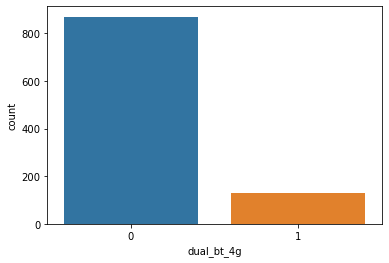

<Figure size 432x288 with 0 Axes>

In [55]:
# Devices with 4g, bt, and dual
mobile_data["dual_bt_4g"] = mobile_data.apply(lambda row: 1 if (row["four_g"] == 1) and (row["dual_sim"] == 1) and (row["blue"] == 1) else 0, axis=1)

# print(mobile_data.head())

devices_bt_4g_dual = len(mobile_data[mobile_data["dual_bt_4g"] == 1])
print(devices_bt_4g_dual, "devices have 4G internet, bluetooth and are dual sim.")

devices_no_bt_4g_dual = len(mobile_data[mobile_data["dual_bt_4g"] == 0])
print(devices_no_bt_4g_dual, "devices have neither 4G internet nor bluetooth nor are they dual sim.")

# Visualize this
sns.countplot(x="dual_bt_4g", data=mobile_data)
plt.show()
plt.clf()


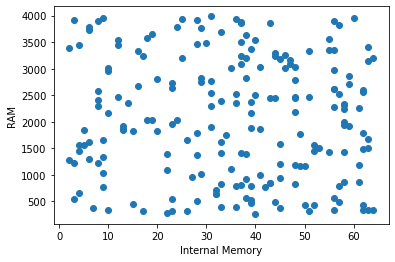

-0.007107273722094879 is the correlation coefficient.


<Figure size 432x288 with 0 Axes>

In [70]:
# Do devices with bigger internal memory have bigger ram
# print(mobile_data.head())

# Random subset
mobile_data_sub = mobile_data.sample(n = int(mobile_data.shape[0] * 0.2))

plt.scatter(x=mobile_data_sub["int_memory"], y=mobile_data_sub["ram"])
plt.xlabel("Internal Memory")
plt.ylabel("RAM")
plt.show()
plt.clf()

# Correlation
from scipy.stats import pearsonr
import numpy as np

mem_ram_corr = np.corrcoef(mobile_data["int_memory"], mobile_data["ram"])
print(mem_ram_corr[0][1], "is the correlation coefficient.")

# There is no association between internal memory and ram. Therefore devices with bigger internal memory dont necessarily have bigger ram.

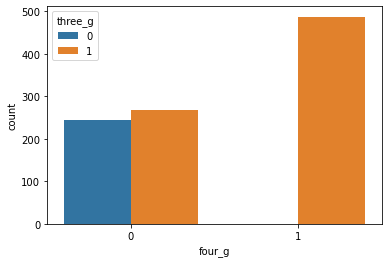

<Figure size 432x288 with 0 Axes>

In [71]:
# Comparing number of 4G and 3G phones(long method) if they are only 4g
sns.countplot(x="four_g", hue="three_g", data=mobile_data)
plt.show()
plt.clf()

# Phones with 4G also have 3G

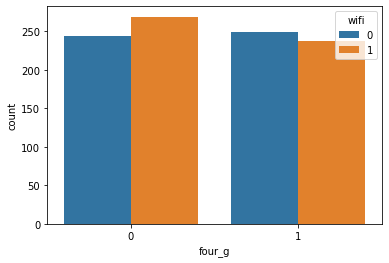

<Figure size 432x288 with 0 Axes>

In [72]:
# Do phones with 4G have wifi connectivity(visualization)
sns.countplot(x="four_g", hue="wifi", data=mobile_data)
plt.show()
plt.clf()

# Most phones with 4G have no  wifi connectivity
# Most phones without 4G have wifi connectivity

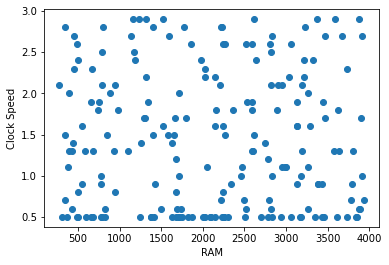

-0.0006496637174011785 is the correlation coefficient.
     ram  clock_speed
0   3476          1.8
1   3895          0.5
2   2396          2.8
3   3893          0.5
4   1773          1.4
5   3506          2.9
6   3873          2.4
7   1495          2.4
8   3485          2.9
9    651          0.5
10  3866          2.2
11  3911          2.9
12   439          1.4
13   992          2.2
14  2751          1.8
15   563          1.0
16  2083          0.5
17  2187          2.9
18  3902          1.7
19  2524          2.6


<Figure size 432x288 with 0 Axes>

In [7]:
# print(mobile_data.head())

# Random subset
mobile_data_sub = mobile_data.sample(n = int(mobile_data.shape[0] * 0.2))

# Do devices with bigger ram take little time to execute
plt.scatter(x=mobile_data_sub["ram"], y=mobile_data_sub["clock_speed"])
plt.xlabel("RAM")
plt.ylabel("Clock Speed")
plt.show()
plt.clf()

# Correlation coefficient
speed_ram_corr = np.corrcoef(mobile_data["ram"], mobile_data["clock_speed"])
print(speed_ram_corr[0][1], "is the correlation coefficient.")

# They are not correlated.
speed_ram = mobile_data[["ram", "clock_speed"]]
print(speed_ram.head(20))